# TRABAJO PRÁCTICO INTEGRADOR N°1

## Sistema de Análisis de Documentos Digitalizados

---

**Información del Estudiante:**
- **Nombre y Apellido:** Raquel Mallqui Espinoza
- **Fecha de Entrega:** 24 de Septiembre de 2025
- **Materia:** Procesamiento de Imágenes - IFTS24

---

### Objetivo

Desarrollar un sistema básico de análisis automático de documentos digitalizados que integre las técnicas de procesamiento de imágenes estudiadas en el curso.

### Estructura del Trabajo

| Parte | Descripción | Peso |
|-------|-------------|------|
| **1** | Fundamentos Teóricos | 20% |
| **2** | Setup del Entorno | 15% |
| **3** | Análisis de Imágenes | 35% |
| **4** | Preprocessing Básico | 30% |

**Dataset requerido:** 3 imágenes de documentos con diferentes características (buena calidad, rotada, con problemas de iluminación)

---

# PARTE 1: Fundamentos Teóricos

## ¿Por qué Cuadernos Interactivos para IA y Ciencias de Datos?

### Diferencias Metodológicas Fundamentales

El trabajo en inteligencia artificial y ciencias de datos requiere un enfoque metodológico diferente al desarrollo de software tradicional. Mientras que la programación tradicional sigue un flujo lineal y predecible, el trabajo con datos es inherentemente iterativo y exploratorio.

**Programación Tradicional:**
```
Requisitos → Diseño → Implementación → Testing → Producto
```

**Investigación en IA/Datos:**
```
Hipótesis ⟷ Experimento ⟷ Análisis ⟷ Refinamiento ⟷ Nueva Hipótesis
```

### Ventajas de los Cuadernos Interactivos

1. **Narrativa Científica:** Permiten documentar el proceso de pensamiento, no solo el resultado final
2. **Iteración Rápida:** Ejecutar y modificar secciones específicas sin reejecutar todo el programa
3. **Visualización Inmediata:** Ver resultados inmediatamente después de cada paso
4. **Comunicación Efectiva:** Stakeholders no técnicos pueden seguir el proceso y entender decisiones
5. **Reproducibilidad:** Otros investigadores pueden replicar exactamente los experimentos

### Casos de Uso en la Industria

- **Google Research:** Publica papers con cuadernos que permiten reproducir experimentos
- **Netflix:** Usa cuadernos para análisis de datos de usuarios y recomendaciones
- **Uber:** Análisis de patrones de viajes y optimización de rutas
- **Kaggle:** Plataforma completa basada en cuadernos para competencias de machine learning

### Cuándo Usar Cada Herramienta

**Usar Cuadernos para:**
- Análisis exploratorio de datos
- Experimentación y prototipado
- Comunicación de resultados
- Educación y documentación

**Usar Scripts para:**
- Sistemas en producción
- Automatización de tareas repetitivas
- APIs y servicios web
- Pipelines de datos automatizados

En este trabajo práctico, usaremos cuadernos porque estamos en la fase de investigación y experimentación, donde necesitamos entender los datos, probar diferentes enfoques y documentar nuestros hallazgos.

---

# PARTE 2: Setup del Entorno

En esta sección vas a configurar tu entorno de trabajo de manera profesional. Un setup bien hecho te ahorra tiempo y errores durante todo el proyecto.

**Material de consulta:** `Utilidades_y_Plantillas.ipynb`

## 2.1 Importaciones Básicas

Importá las librerías necesarias para procesamiento de imágenes y visualización:

In [56]:
# Importá aquí las librerías necesarias
# Necesitarás: numpy, matplotlib, opencv, y configuraciones básicas
import numpy as np          # Operaciones numéricas y arrays multidimensionales
import pandas as pd         # Análisis y manipulación de datos estructurados

# Bibliotecas de visualización
import matplotlib.pyplot as plt    # Gráficos y visualizaciones básicas
import seaborn as sns             # Visualizaciones estadísticas avanzadas

# Procesamiento de imágenes - Bibliotecas principales
from PIL import Image, ImageEnhance           # Python Imaging Library - carga y manipulación básica
import cv2                                    # OpenCV - procesamiento avanzado (nota: usa BGR)
from skimage import color, feature, measure, filters, morphology, segmentation  # Scikit-image - algoritmos especializados


## 2.2 Funciones Utilitarias

Implementá una función básica para cargar y mostrar información de imágenes:

In [57]:
def cargar_imagen(path, target_size=None):
    """
    Carga una imagen de forma segura con manejo completo de errores.
    Convierte automáticamente a RGB y normaliza valores entre 0-1.

    Args:
        path (str): Ruta completa al archivo de imagen
        target_size (tuple): Tupla (ancho, alto) para redimensionar la imagen

    Returns:
        numpy.ndarray: Array normalizado (0-1) o None si hay error

    Ejemplo:
        img = cargar_imagen_segura('foto.jpg', target_size=(256, 256))
    """
    try:
        # Abrir imagen usando PIL (soporta múltiples formatos)
        img = Image.open(path)

        # Convertir a RGB si está en otro modo (RGBA, L, etc.)
        # Esto garantiza consistencia en el número de canales
        if img.mode != 'RGB':
            img = img.convert('RGB')

        # Redimensionar si se especifica un tamaño objetivo
        # LANCZOS ofrece mejor calidad para redimensionamiento
        if target_size:
            img = img.resize(target_size, Image.Resampling.LANCZOS)

        # Convertir a numpy array y normalizar a rango [0,1]
        # División por 255 convierte de uint8 [0,255] a float [0,1]
        return np.array(img) / 255.0

    except Exception as e:
        # Capturar cualquier error (archivo no encontrado, formato no válido, etc.)
        print(f"Error cargando {path}: {e}")
        return None


def mostrar_imagen_info(imagen, titulo="Imagen"):
    """
    Muestra información estadística completa de una imagen.
    Útil para debugging y análisis exploratorio.

    Args:
        imagen (numpy.ndarray): Array de la imagen
        titulo (str): Título descriptivo para la salida

    Ejemplo:
        mostrar_imagen_info(mi_imagen, "Imagen Original")
    """
    print(f"{titulo.upper()}:")
    print(f"   Shape: {imagen.shape}")                    # Dimensiones (altura, ancho, canales)
    print(f"   Tipo de datos: {imagen.dtype}")           # Tipo de datos (float64, uint8, etc.)
    print(f"   Rango de valores: [{imagen.min():.3f}, {imagen.max():.3f}]")  # Min y max
    print(f"   Valor promedio: {imagen.mean():.3f}")     # Media de todos los píxeles
    print(f"   Desviación estándar: {imagen.std():.3f}") # Variabilidad de los valores

## 2.3 Verificación del Setup

Probá que todo funciona creando una imagen sintética simple:

In [58]:
# Crear un gradiente sintético
ancho, alto = 128, 128
gradiente = np.tile(np.linspace(0, 255, ancho, dtype=np.uint8), (alto, 1))

# Guardar en disco (para usar con cargar_imagen)
Image.fromarray(gradiente).save("gradiente.png")

# Usar tus funciones
img = cargar_imagen("gradiente.png")
mostrar_imagen_info(img, "Gradiente Sintético")

GRADIENTE SINTÉTICO:
   Shape: (128, 128, 3)
   Tipo de datos: float64
   Rango de valores: [0.000, 1.000]
   Valor promedio: 0.498
   Desviación estándar: 0.290


---

# PARTE 3: Análisis de Tu Dataset

Ahora vas a trabajar con tu dataset de 3 documentos. Esta parte es clave para entender qué problemas tenés que resolver.

**Preparación del Dataset:**
- Creá una carpeta llamada `dataset/` en la misma ubicación que este notebook
- Incluí exactamente 3 imágenes de documentos:
  1. Una de buena calidad (bien iluminada, recta)
  2. Una rotada o inclinada
  3. Una con problemas (oscura, borrosa, o con sombras)

## 3.1 Carga de las Imágenes

**Material de consulta:** `002/TEO/LeerImagenColor.ipynb`

In [59]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [60]:
# Define las rutas a tus 3 imágenes
rutas_imagenes = [
    "/content/Dataset/imagen_buena_calidad_1.png",  # Buena calidad
    "/content/Dataset/Imagen_rotada_1.png",  # Rotada
    "/content/Dataset/imagen_poca_Luz_1.png"   # Con problemas
]

# Carga las 3 imágenes usando tu función
imagenes = []
nombres = ["Buena Calidad", "Rotada", "Con Problemas"]

# Tu código aquí
for ruta, nombre in zip(rutas_imagenes, nombres):
    img = cargar_imagen(ruta)
    if img is not None:
        print(f" Imagen cargada: {nombre}")
        mostrar_imagen_info(img, nombre)
        imagenes.append(img)
    else:
        print(f" No se pudo cargar: {nombre}")

 Imagen cargada: Buena Calidad
BUENA CALIDAD:
   Shape: (780, 603, 3)
   Tipo de datos: float64
   Rango de valores: [0.000, 1.000]
   Valor promedio: 0.894
   Desviación estándar: 0.130
 Imagen cargada: Rotada
ROTADA:
   Shape: (887, 790, 3)
   Tipo de datos: float64
   Rango de valores: [0.000, 1.000]
   Valor promedio: 0.834
   Desviación estándar: 0.122
 Imagen cargada: Con Problemas
CON PROBLEMAS:
   Shape: (780, 603, 3)
   Tipo de datos: float64
   Rango de valores: [0.000, 0.984]
   Valor promedio: 0.424
   Desviación estándar: 0.321


## 3.2 Inspección Visual y Análisis

**Material de consulta:** `002/Fundamentos_Imagen_Digital.ipynb`

IMÁGENES - Formato RGB de Matplotlib


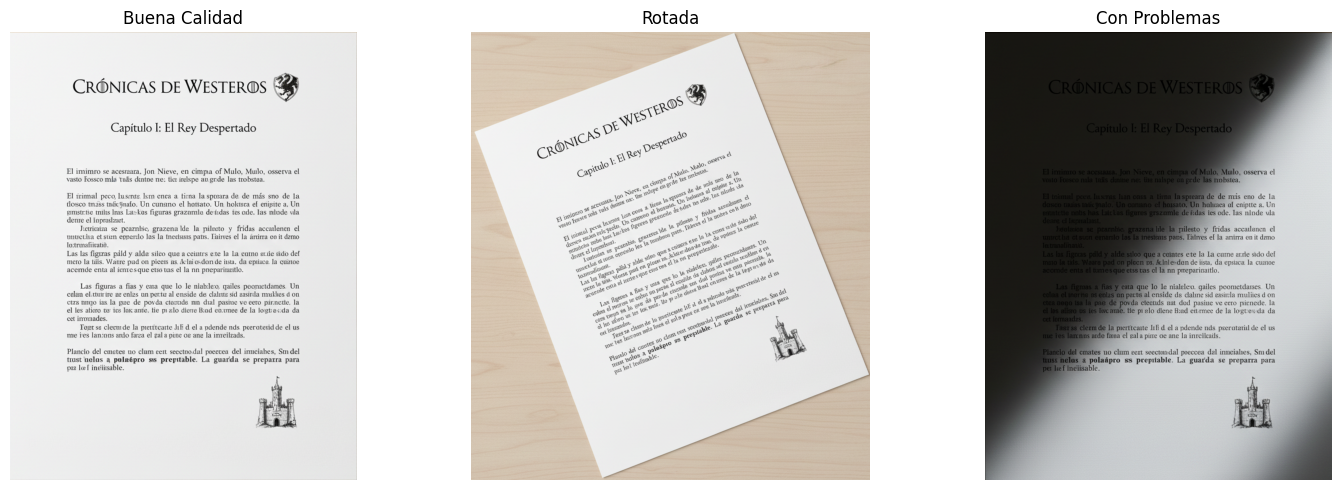

In [61]:
# Mostra las 3 imágenes lado a lado con sus nombres
# Usa subplots de matplotlib

# Tu código aquí
print("IMÁGENES - Formato RGB de Matplotlib")

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
# Recorrer imágenes y nombres
for ax, img, nombre in zip(axes, imagenes, nombres):
    ax.imshow(img)
    ax.set_title(nombre)
    ax.axis("off")  # Quitar ejes para que se vea más limpio

plt.tight_layout()
plt.show()


HISTOGRAMA DE IMÁGENES - Formato RGB de Matplotlib

BUENA CALIDAD:
   Shape: (780, 603, 3)
   Tipo de datos: float64
   Rango de valores: [0.000, 1.000]
   Valor promedio: 0.894
   Desviación estándar: 0.130


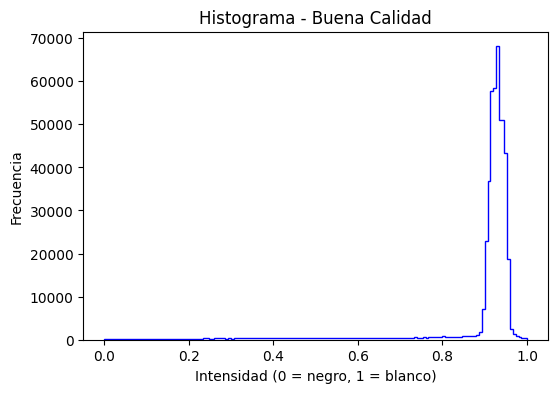

ROTADA:
   Shape: (887, 790, 3)
   Tipo de datos: float64
   Rango de valores: [0.000, 1.000]
   Valor promedio: 0.834
   Desviación estándar: 0.122


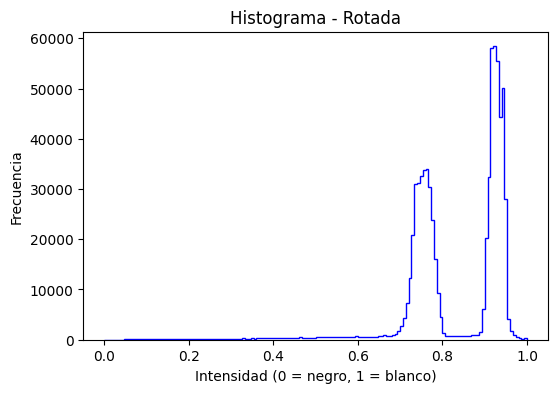

CON PROBLEMAS:
   Shape: (780, 603, 3)
   Tipo de datos: float64
   Rango de valores: [0.000, 0.984]
   Valor promedio: 0.424
   Desviación estándar: 0.321


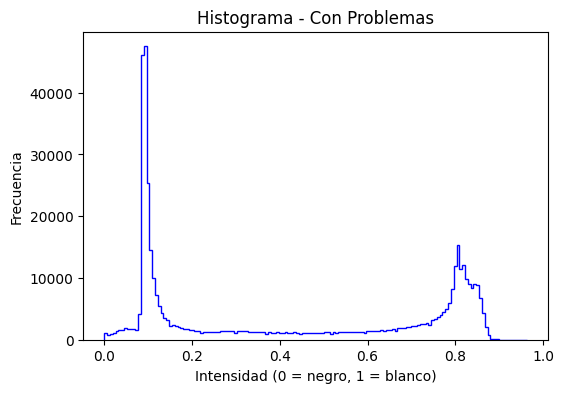

In [62]:
print("HISTOGRAMA DE IMÁGENES - Formato RGB de Matplotlib\n")

for img, nombre in zip(imagenes, nombres):
    # Mostrar info básica en consola
    mostrar_imagen_info(img, nombre)

    # Histograma en escala de grises (promedio de los 3 canales)
    img_gray = img.mean(axis=2)

    plt.figure(figsize=(6,4))
    plt.hist(img_gray.ravel(), bins=150, color='blue', histtype='step')  # sin relleno
    plt.title(f"Histograma - {nombre}")
    plt.xlabel("Intensidad (0 = negro, 1 = blanco)")
    plt.ylabel("Frecuencia")
    plt.show()  # mostrar cada histograma inmediatamente después de su info

## 3.3 Identificación de Problemas

Basándote en tu inspección visual, identificá los problemas principales de cada imagen:

**Imagen 1 (Buena Calidad):**
- Problemas identificados: Dado que la imagen es de texto es esperable que la media esté más cerca del uno(0,89) y que el desvío cerca del cero. Pero hay dos problemas que se tienen que tratar, en primer lugar el tamaño de la imagen, dado que su tamaño no es una tamaño estandar y el otro punto importante es el tipo de dato, ya que float64 requiere del doble de procesamiento de RAM y GPU. Además se está usando 3 canales innecesariamente.

- Preprocessing necesario: Convertir a escala de grises y trabajar con datos estandar del tipo uint8(recomendado para el tratamiento de imágenes)

**Imagen 2 (Rotada):**
- Problemas identificados: El tipo de datos, canales innecesarios y la rotación de la imágen.

- Preprocessing necesario: Estandarizar el tipo de datos a uint8, 3 canales innecesarios ya que basta con trabajar con una escala de grises y por último antes de aplicar el reconocimiento óptico de Caracteres(OCR) lo que se tiene que hacer es rotar.

**Imagen 3 (Con Problemas):**
- Problemas identificados: En este caso en particular se puede ver en el histograma que la imagen no tiene blancos puros, el valor de la media(brillo) es mucho más baja a comparación que las otras imágenes esto confirma que la imagen es más oscura que las otras y con el desvío estandar(contraste) más alto confirma que hay zonas más oscuras que otras, es decir es muy evidente el fondo no uniforme. Tres canales innecesarios y formato de datos.

- Preprocessing necesario: Conversión a escala de grises, usar un formato estándar, Normalización de contraste o iluminación y una binarización robusta.

---

# PARTE 4: Preprocessing Básico

Ahora vas a aplicar técnicas de preprocessing para mejorar cada imagen. Trabajá con una imagen por vez.

## 4.1 Segmentación Básica

Separar el documento del fondo es el primer paso crítico.

**Material de consulta:** `Segmentacion.ipynb` (especialmente las funciones de umbralización)

Dado que estoy trabajando con imagenes de texto es recomendable el uso de un tipo de formato float32 o uint8, además como el procesamiento lo voy hacer usando openCV voy a convertir el rango [0;255].

In [63]:
# Elegí UNA de tus imágenes para trabajar primero
imagen_buena = imagenes[0]  # Cambiá el índice según necesites

# Convertí a escala de grises
# Tu código aquí
imagen_buena_gris = color.rgb2gray(imagen_buena)
imagen_buena_gris_uint8 = (imagen_buena_gris*255).astype(np.uint8)

imagen_rotada = imagenes[1]  # Cambiá el índice según necesites

# Convertí a escala de grises
# Tu código aquí
imagen_rotada_gris = color.rgb2gray(imagen_rotada)
imagen_rotada_gris_uint8 = (imagen_rotada_gris*255).astype(np.uint8)

imagen_poca_luz = imagenes[2]  # Cambiá el índice según necesites

# Convertí a escala de grises
# Tu código aquí
imagen_poca_luz_gris = color.rgb2gray(imagen_poca_luz)
imagen_poca_luz_gris_uint8 = (imagen_poca_luz_gris*255).astype(np.uint8)


### 4.1.1 Preprocessing de la imagen de buena calidad

IMAGEN:
   Shape: (780, 603)
   Tipo de datos: uint8
   Rango de valores: [0.000, 255.000]
   Valor promedio: 227.655
   Desviación estándar: 33.209


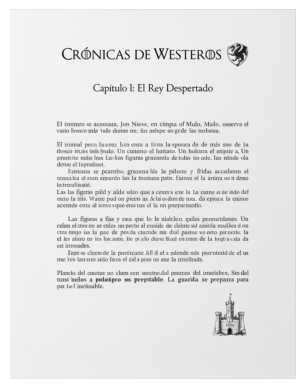

In [64]:
# Mostramos la imagen
mostrar_imagen_info(imagen_buena_gris_uint8)

plt.imshow(imagen_buena_gris_uint8, cmap='gray')
plt.axis('off')  # Opcional: quita los ejes
plt.show()

In [65]:
# Aplicá segmentación por umbralización
# Probá diferentes valores hasta encontrar el mejor

# Tu código aquí
# Diferentes umbrales fijos
_, th1 = cv2.threshold(imagen_buena_gris_uint8, 100, 255, cv2.THRESH_BINARY)   # Umbral en 100
_, th2 = cv2.threshold(imagen_buena_gris_uint8, 127, 255, cv2.THRESH_BINARY)   # Umbral en 127
_, th3 = cv2.threshold(imagen_buena_gris_uint8, 170, 255, cv2.THRESH_BINARY)   # Umbral en 150

# Umbral automático de Otsu (elige el mejor valor)
_, th_otsu = cv2.threshold(imagen_buena_gris_uint8, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)




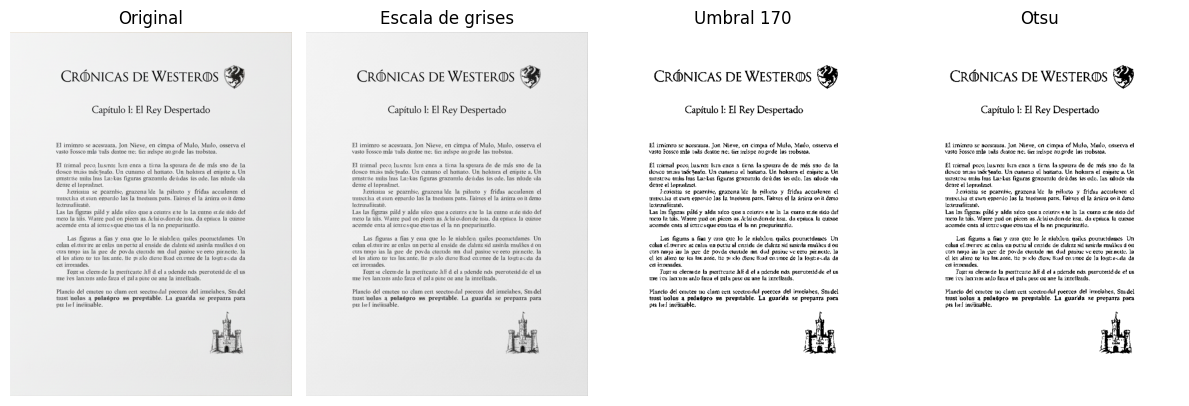

In [66]:
# Mostrá el resultado: original, escala de grises, y máscara
# Tu código aquí
# Mostrar resultados
titles = ['Original', 'Escala de grises', 'Umbral 170', 'Otsu']
images = [imagen_buena, imagen_buena_gris_uint8, th3, th_otsu]

plt.figure(figsize=(12,6))
for i in range(len(images)):
    plt.subplot(1, 4, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()

### 4.1.2 Comparación de Resultados

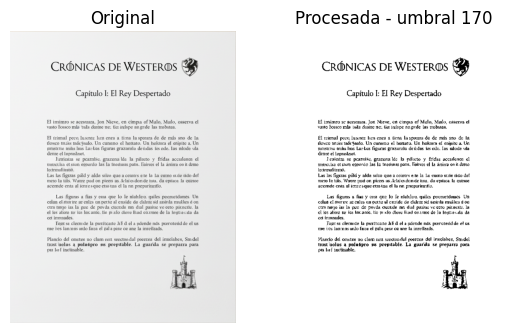

In [68]:
#Aqui coloco el código con el umbral elegido:
_, th_170_buena_calidad = cv2.threshold(imagen_buena_gris_uint8, 170, 255, cv2.THRESH_BINARY)
# Mostramos antes y después
plt.subplot(1,2,1)
plt.imshow(imagen_buena, cmap='gray')
plt.title("Original")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(th_170_buena_calidad, cmap='gray')
plt.title("Procesada - umbral 170")
plt.axis('off')
plt.show()

## 4.2 Mejora de Calidad

**Material de consulta:** `Mejora_Imagen_Ecualizacion.ipynb`

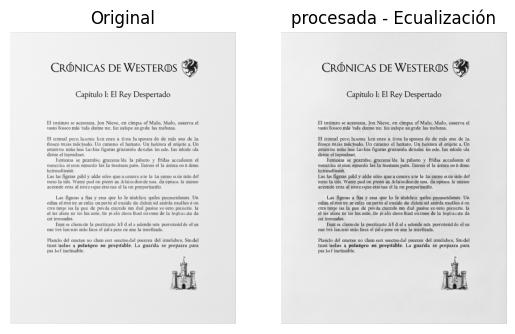

In [69]:
# Si tu imagen tiene problemas de contraste, aplicá ecualización
# Tu código aquí
#img_eq = cv2.equalizeHist(imagen_buena_gris_uint8)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8)) #Ecualización adaptativa
img_clahe_buena = clahe.apply(imagen_buena_gris_uint8)
# Mostramos antes y después
plt.subplot(1,2,1)
plt.imshow(imagen_buena_gris_uint8, cmap='gray')
plt.title("Original")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(img_clahe_buena, cmap='gray')
plt.title("procesada - Ecualización")
plt.axis('off')
plt.show()


Conclusión: No veo muchos cambios ya que la imagen es de buena calidad, en este caso en particular no hace falta ecualizar la imagen, pero la dejo a modo de práctica.


## 4.4 Aplicación a las Otras Imágenes

Repetí el proceso para tus otras 2 imágenes, adaptando las técnicas según los problemas específicos de cada una:

### 4.4.1 Imagen con sombras
Dado que la imagen que necesita este preprocessing es la imagen "con poca luz" o "con sombras", trabajo con esta:

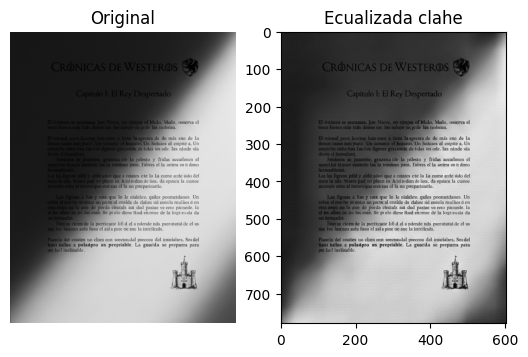

In [47]:
# Si tu imagen tiene problemas de contraste, aplicá ecualización
# Tu código aquí
#img_eq = cv2.equalizeHist(imagen_poca_luz_gris_uint8)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8)) #Ecualización adaptativa
img_clahe = clahe.apply(imagen_poca_luz_gris_uint8)
# Mostramos antes y después
plt.subplot(1,2,1)
plt.imshow(imagen_poca_luz_gris_uint8, cmap='gray')
plt.title("Original")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(img_clahe, cmap='gray')
plt.title("Ecualizada clahe")
plt.axis('on')
plt.show()


**Conclusión:**

Aplicar ecualización a esta imagen no es recomendale porque hay zonas muy oscuras y cuando se aplica una ecualización veo que no mejora mucho la imagen, tampoco lo hace cuando le aplico una ecualización adaptativa.

Por lo tanto, en el siguiente espacio de código hago el preprocessing usando otras técnicas:

Para suavisar y reducir el ruido de la imagen uso un filtro gausino (función de openCV GaussianBlur)
Después es necesario corregir la iluminación, para eso uso la función divide de openCV, que lo que hace básicamente es hacer una división entre la imagen original(escala de grises) y la imagen obtenida después de pasarla por el filtro gausiano, con el objetivo de "eliminar" el componente de iluminación, es decir donde había una sombra la división aumentará el valor del pixel original, aclarando la zona y donde hay buena iluminación la división tendrá menos efecto.

In [ ]:
#Como la iluminación es muy desigual, lo que hago es una corrección de la iluminación
blur = cv2.GaussianBlur(imagen_poca_luz_gris_uint8, (55,55), 0)
iluminacion_corregida = cv2.divide(imagen_poca_luz_gris_uint8, blur, scale=255)

norm = cv2.normalize(imagen_poca_luz_gris_uint8, None, 0, 255, cv2.NORM_MINMAX)

th_procesada_poca_luz = cv2.adaptiveThreshold(imagen_poca_luz_gris_uint8, 255,
                           cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                           cv2.THRESH_BINARY, 35, 11)

### 4.4.2 Comparación de Resultados

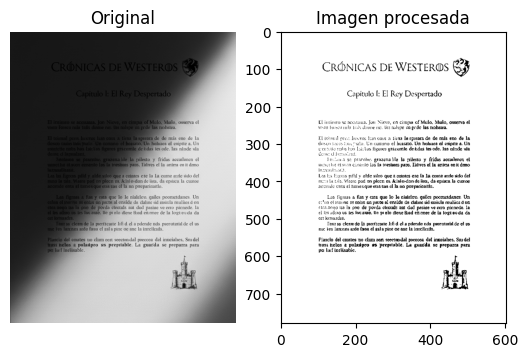

In [55]:
# Mostramos antes y después
plt.subplot(1,2,1)
plt.imshow(imagen_poca_luz_gris_uint8, cmap='gray')
plt.title("Original")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(th_procesada_poca_luz, cmap='gray')
plt.title("Imagen procesada")
plt.axis('on')
plt.show()

### 4.4.3 Imagen rotada




IMAGEN:
   Shape: (887, 790)
   Tipo de datos: uint8
   Rango de valores: [0.000, 255.000]
   Valor promedio: 213.565
   Desviación estándar: 28.794


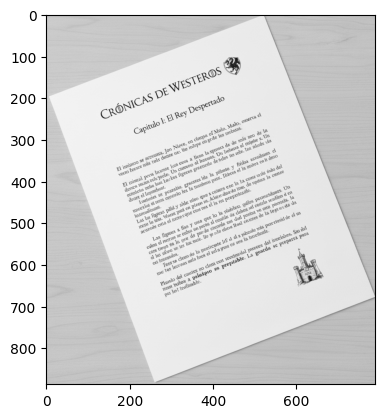

In [12]:
# Si tu imagen está rotada, aplicá corrección básica
# Material de consulta: Transformaciones_Geometricas.ipynb

# Tu código aquí
# Elegí UNA de tus imágenes para trabajar primero
imagen_rotada = imagenes[1]  # Cambiá el índice según necesites

# Convertí a escala de grises
# Tu código aquí
imagen_rotada_gris = color.rgb2gray(imagen_rotada)
imagen_rotada_gris_uint8 = (imagen_rotada_gris*255).astype(np.uint8)
# Mostramos la imagen
mostrar_imagen_info(imagen_rotada_gris_uint8)

plt.imshow(imagen_rotada_gris_uint8, cmap='gray')
plt.axis('on')  # Opcional: quita los ejes
plt.show()

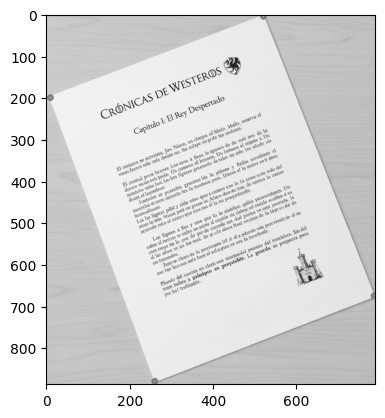

In [34]:
# Primero coordenada x, despues coordenada y
corners = [(10, 200), # Superior izquierdo
           (520, 5), # Superior derecho
           (260, 880), # Inferior izquierdo
           (785,  675) # Inferior derecho
          ]

img_copy = imagen_rotada_gris_uint8.copy() #Para probar es importante hacer una copia, porque sino se modifica la imagen original

for x, y in corners:
    cv2.circle(img_copy, (x, y), radius=5, color=(127), thickness=5)

plt.figure()
plt.imshow(img_copy, cmap='gray')
plt.axis('on')
plt.show()

In [37]:
w, h = 600, 800

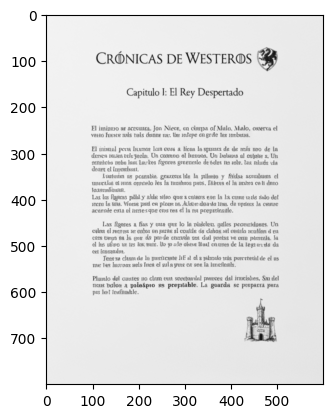

In [71]:
pts1 = np.float32(corners)
# Para los puntos de destino, debe preservarse el orden de los puntos originales
pts2 = np.float32([[0, 0], [w, 0], [0, h], [w, h]])

# Obtenemos la matriz de cambio de perspectiva
matrix = cv2.getPerspectiveTransform(pts1, pts2)

img_rotada_proc = cv2.warpPerspective(imagen_rotada_gris_uint8, matrix, (w, h))
plt.imshow(img_rotada_proc, cmap='gray');

Voy aplicar segmentación por umbrales


In [84]:
#Aqui coloco el código con el umbral elegido:
_, th_170_rotada = cv2.threshold(img_rotada_proc, 170, 255, cv2.THRESH_BINARY)


### 4.4.4 Comparación de Resultados

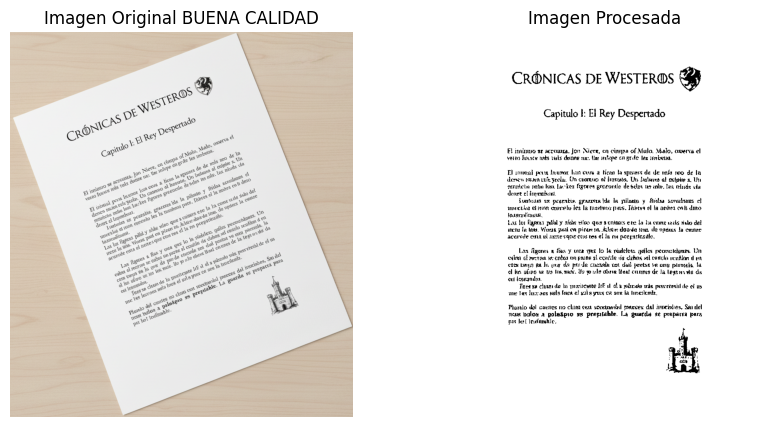

In [85]:
# Mostrá lado a lado: imagen original vs imagen procesada
# Tu código aquí
# Mostrar ambas imágenes
plt.figure(figsize=(10,5))

# Imagen original
plt.subplot(1, 2, 1)
plt.imshow(imagen_rotada)
plt.title('Imagen Original BUENA CALIDAD')
plt.axis('off')

# Imagen procesada
plt.subplot(1, 2, 2)
plt.imshow(th_170_rotada, cmap='gray')
plt.title('Imagen Procesada')
plt.axis('off')

plt.show()

## 4.5 Resultados Finales

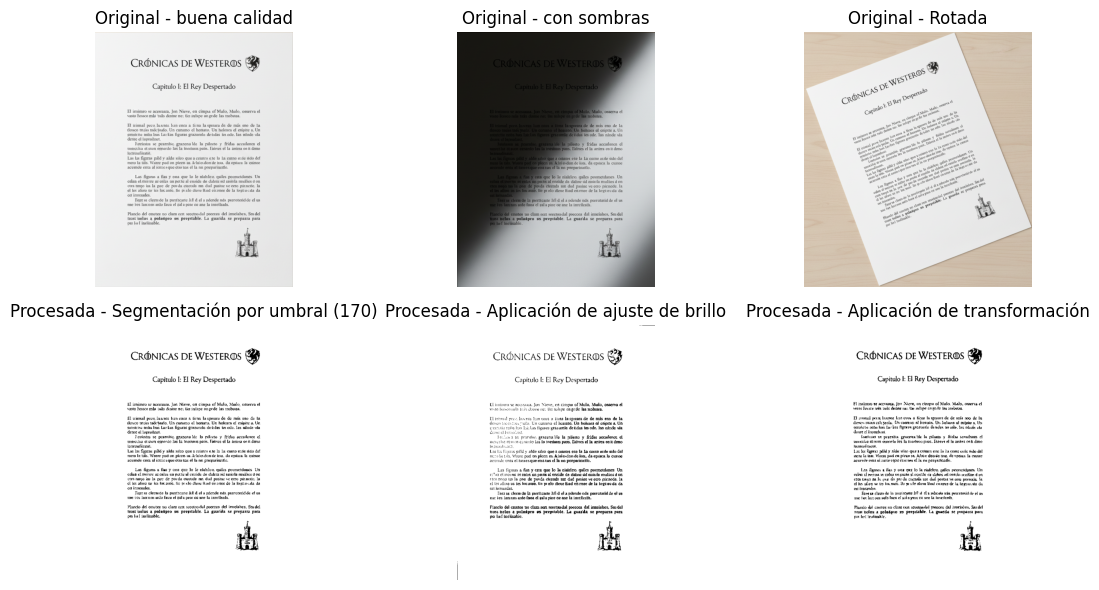

In [86]:
# Creá un grid mostrando las 3 imágenes originales y las 3 procesadas
# Tu código aquí
# Crear el grid 2x3
plt.figure(figsize=(12, 6))

# Fila 1: imágenes originales
plt.subplot(2, 3, 1)
plt.imshow(imagen_buena)
plt.title("Original - buena calidad")
plt.axis("off")

plt.subplot(2, 3,3)
plt.imshow(imagen_rotada)
plt.title("Original - Rotada")
plt.axis("off")

plt.subplot(2, 3, 2)
plt.imshow(imagen_poca_luz)
plt.title("Original - con sombras")
plt.axis("off")

# Fila 2: imágenes procesadas
plt.subplot(2, 3, 4)
plt.imshow(th_170_buena_calidad, cmap="gray")
plt.title("Procesada - Segmentación por umbral (170)")
plt.axis("off")

plt.subplot(2, 3, 6)
plt.imshow(th_170_rotada, cmap="gray")
plt.title("Procesada - Aplicación de transformación")
plt.axis("off")

plt.subplot(2, 3, 5)
plt.imshow(th_procesada_poca_luz, cmap="gray")
plt.title("Procesada - Aplicación de ajuste de brillo")
plt.axis("off")

plt.tight_layout()
plt.show()

---

# REFLEXIÓN FINAL

## Análisis de Resultados

**¿Qué técnica fue más efectiva para cada tipo de problema?**


*   Para la imagen de buena calidad, no había mucho que hacer, ya desde el histograma sabía que venía con buenos valores, pero aún así pude aplicar la segmentación por umbrales, obteniendo una imagen en donde se podía ver mejor las letras del texto. A modo de prueba, intente ecualizar esta imagen, pero el resultado no fue bueno, entendiendo así que este método está pensada para imagen con problemas
*   Para la imagen de con sombras, en primer lugar le aplique una ecualización pero después de ver el resultado me di cuenta que no era la técnica apropiada, así que usando un filtro gauseano y usando la función division de openCV obtuve mejorar la iluminación de la imagen.


*   Para la imagen rotada, fue muy interesante encontrar los contornos para luego rotar la imagen, cuando obtuve la imagen resultante tuve que aplicar segmentación para uniformizar la imagen.


**¿Qué técnica fue más efectiva para cada tipo de problema?**


Para la imagen de buena calidad, no había mucho que hacer. Ya desde el histograma se veía que los valores estaban dentro de lo esperado, pero aun así apliqué la segmentación por umbrales y logré resaltar un poco más las letras del texto. A modo de prueba intenté ecualizar esta imagen, pero el resultado no fue bueno, entendiendo así que este método está pensado para imágenes con problemas de contraste o iluminación, y no para documentos que ya están bien escaneados.

Para la imagen con sombras, en un primer momento probé con una ecualización, pero el resultado no fue el esperado. Luego, aplicando un filtro gaussiano y usando la función cv2.divide de OpenCV, pude mejorar la iluminación de la imagen y compensar mejor las zonas oscuras y claras. Esta técnica fue más efectiva que la ecualización en este caso.

Para la imagen rotada, fue muy interesante trabajar con los contornos para luego aplicar la rotación y obtener el documento alineado. Una vez corregida la orientación, apliqué segmentación para uniformizar la imagen y mejorar la legibilidad del texto.


**¿Qué desafíos encontraste durante el procesamiento?**

Uno de los principales desafíos fue identificar qué técnica aplicar en cada imagen, ya que no existe un único procedimiento que sirva para todos los casos. También me encontré con dificultades técnicas como:

manejar los diferentes formatos de las imágenes (float64, uint8),

elegir correctamente los umbrales en la segmentación,

y evitar resultados indeseados cuando probaba ecualización en imágenes que no lo necesitaban.

Además, al trabajar con las imágenes rotadas, resultó complicado ajustar los puntos manualmente sin que quedaran marcas extra en la visualización.


**¿En qué casos los resultados no fueron óptimos y por qué?**

Los resultados no fueron óptimos en las imágenes con problemas fuertes de iluminación (por ejemplo, aquellas con sombras muy marcadas). Aunque logré mejorar la visibilidad con corrección de iluminación, las sombras no se eliminaron por completo. Esto se debe a que el contraste entre las zonas iluminadas y oscuras era demasiado alto, y métodos como ecualización global o adaptativa no alcanzan para corregirlo del todo.

También noté que al ecualizar imágenes de buena calidad, el resultado era peor, lo que confirma que no todas las técnicas son universales y que aplicar un método de más puede empeorar la calidad final.


##Aprendizaje Adquirido


**¿Qué conceptos del curso fueron más útiles?**


Me resultaron muy útiles los conceptos de preprocesamiento de imágenes, como la conversión a escala de grises, la importancia de normalizar los valores de los píxeles y la segmentación por umbralización. También fue clave entender la diferencia entre técnicas globales (ecualización de histograma, umbral fijo) y técnicas locales o adaptativas (CLAHE, umbralización adaptativa), ya que en la práctica se ve claramente en qué situaciones conviene cada una.


**¿Cómo podrías mejorar este sistema en futuras versiones?**


Una posible mejora sería automatizar parte del proceso, por ejemplo, detectar automáticamente si una imagen tiene problemas de iluminación y aplicar la corrección más adecuada sin intervención manual. También se podría implementar un método para corregir la perspectiva y la rotación automáticamente usando detección de bordes o esquinas, en lugar de seleccionar los puntos a mano. Finalmente, se podría integrar un paso de limpieza de ruido para mejorar todavía más la legibilidad del texto en imágenes con mala calidad.


## Entregables

1. Este notebook completamente ejecutado con resultados
2. Carpeta `dataset/` con tus 3 imágenes
3. Las reflexiones completadas

**Fecha de entrega:** 24 de Septiembre, 23:59

---